The goal of this little analysis is to a portfolio analysis on the MSCI World Index (from yahoo financial datasource) 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [45]:
#load S&P data - creating a data frame
df = pd.read_csv("../data/sp500data.csv", parse_dates=['Date'], index_col='Date')
#set data to index
#f['Date'] = pd.to_datetime(df['Date'])
#df.index = pd.to_datetime(df.index)
print(df.head())




            Open       High        Low      Close  Adj Close    Volume
Date                                                                  
1970-01-02   0.0  93.540001  91.790001  93.000000  93.000000   8050000
1970-01-05   0.0  94.250000  92.529999  93.459999  93.459999  11490000
1970-01-06   0.0  93.809998  92.129997  92.820000  92.820000  11460000
1970-01-07   0.0  93.379997  91.930000  92.629997  92.629997  10010000
1970-01-08   0.0  93.470001  91.989998  92.680000  92.680000  10670000


In [46]:
#Chunk Dataframe - 10 years of historical information

def filter_df(df, start_date):

    # Get the current date
    end_date = datetime.now()

    # Filter the DataFrame for the date range
    return df[(df.index >= start_date) & (df.index <= end_date)]

start_date = pd.Timestamp('2023-01-01')
df_new = filter_df(df, start_date)
df_new.head(2)





,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000


In [47]:
#function to calculate monthly returns = (current - prev) / prev)
def calculate_returns(close_price):
    returns = []
    for i in range(1, len(close_price)):
        current = close_price[i]
        prev = close_price[i-1]
        daily_return = (current - prev) / prev * 100
        returns.append(daily_return)
    return returns

In [48]:
#in python - it is possible to use the pourcentage change
''' def calculate_returns(df, column_name):
    df['Ret'] = df[column_name].pct_change() * 100
    return df

# Calculate daily returns
df_ret = calculate_returns(df, 'Close')
df_ret.head(10) '''

#with lambda function
calculate_returns = lambda x: 0 if np.isnan(x) else x * 100

# Apply the lambda function to the selected close price column
# We use pct_change() to calculate the percentage change and then apply the lambda function
df_new['Ret'] = df_new['Close'].pct_change().apply(calculate_returns)

# Calculate cumulative return
df_new['Cum_ret'] = (1 + df_new['Ret']).cumprod() - 1

df_new.head(3)



/var/folders/7p/2dk123_57594_s7c75th_lfh0000gn/T/ipykernel_61818/312192459.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Ret'] = df_new['Close'].pct_change().apply(calculate_returns)
/var/folders/7p/2dk123_57594_s7c75th_lfh0000gn/T/ipykernel_61818/312192459.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Cum_ret'] = (1 + df_new['Ret']).cumprod() - 1


,Open,High,Low,Close,Adj Close,Volume,Ret,Cum_ret
Date,,,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000,0.000000,0.000000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000,0.753897,0.753897
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000,-1.164553,-1.288609


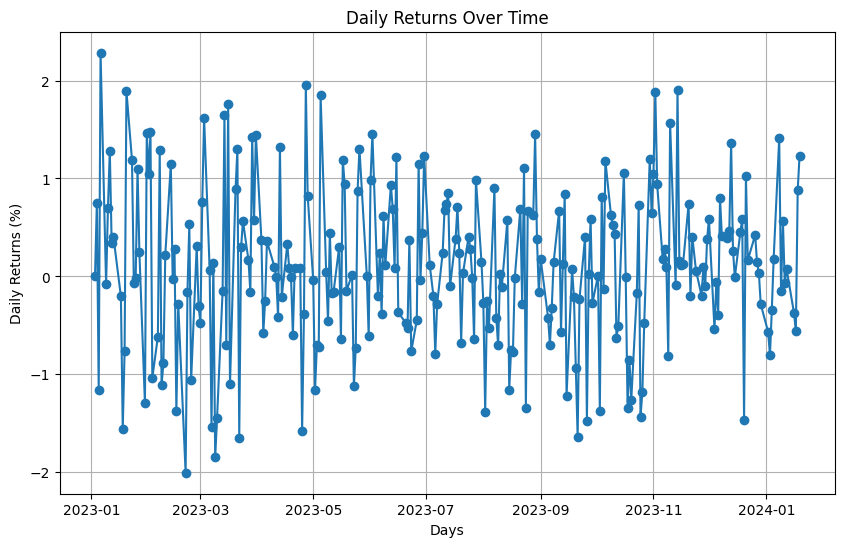

In [49]:
#Plotting daily returns
plt.figure(figsize=(10, 6))
plt.plot(df_new['Ret'], marker='o', linestyle='-')
plt.title('Daily Returns Over Time')
plt.xlabel('Days')
plt.ylabel('Daily Returns (%)')
plt.grid(True)
plt.show()



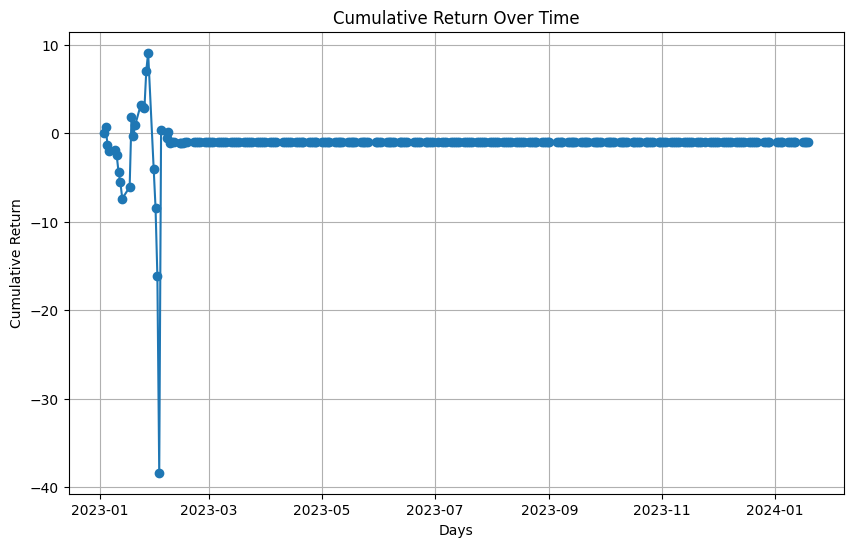

In [50]:
#Plotting cumulative return
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_new['Cum_ret'], marker='o', linestyle='-')
plt.title('Cumulative Return Over Time')
plt.xlabel('Days')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()
